In [ ]:
## 获取所有运行的句柄名

In [2]:
import win32gui

hwnd_title = dict()

def get_all_hwnd(hwnd, mouse):
    if win32gui.IsWindow(hwnd) and win32gui.IsWindowEnabled(hwnd) and win32gui.IsWindowVisible(hwnd):
        hwnd_title.update({hwnd:win32gui.GetWindowText(hwnd)})
 
win32gui.EnumWindows(get_all_hwnd, 0)
for h,t in hwnd_title.items():
    if t != "":
        print(h, t)

19661620 python
23203500 yolov8 – D:\A_study\project\python\yolov8\.notebook\2-获取窗口句柄和截图.ipynb
1575706 守望先锋-识别
1705402 守望先锋
2034968 OurPlay PC版
1706742 战网
2100660 录屏
2231294 任务管理器
6689138 回收站
4982834 Train - Ultralytics YOLOv8 Docs - Google Chrome
1048856 tmp
28577288 ChatGPT - Google Chrome
593908 Alienware Command Center
2492372 Alienware Command Center
593632 OS (C:)
1115702 获取屏幕大小 - Google Chrome
1574788 设置
1903432 设置
592202 Windows 输入体验
132102 NVIDIA GeForce Overlay
1771552 Program Manager


In [3]:
## 截图

    # 测试下来 pyqt 和 win32 速度差不多, 截图单个窗口（全屏状态）速度 10-20ms, 1/4屏 5ms左右
    
    # Python获取屏幕截图的4种方法 https://zhuanlan.zhihu.com/p/665240480
    # python调用win32接口进行截图 https://www.cnblogs.com/enumx/p/12337132.html
    
    # 使用 pyqt 截图后将 QImage 类型转换成 ndarray
    # https://deepinout.com/numpy/numpy-questions/700_numpy_qimage_to_numpy_array_using_pyside.html

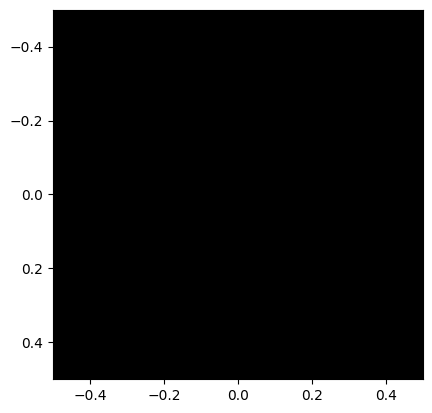

0.16594648361206055


In [4]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 在 jupyter 中执行有问题, 要在py文件中执行
import time

from PyQt5.QtWidgets import QApplication
from PyQt5.QtGui import QImage
import win32gui
import sys
import numpy as np
from matplotlib import pyplot

# 未用到, 但要有, 这行大概执行100ms, 可以放在截图函数外部
app = QApplication(sys.argv)

def test_pyqt():

    # 获取窗口的句柄，注意窗口不能最小化
    hwnd = win32gui.FindWindow(None, '守望先锋')

    screen = app.primaryScreen()
    qimage = screen.grabWindow(hwnd).toImage()

    qimage = qimage.convertToFormat(QImage.Format.Format_RGB888)
    width = qimage.width()
    height = qimage.height()

    buffer = qimage.constBits()
    buffer.setsize(height * width * 3)
    arr = np.frombuffer(buffer, dtype=np.uint8).reshape((height, width, 3))
    pyplot.imshow(arr)
    pyplot.show()


t1 = time.time()
test_pyqt()
print(time.time() - t1)

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 在 jupyter 中执行有问题, 要在py文件中执行

In [5]:
import time

import win32gui, win32ui, win32con
import cv2
import numpy


def test_win32_screenshot():
    # 获取窗口的句柄，注意窗口不能最小化
    hWnd = win32gui.FindWindow(None, "守望先锋")
    # 获取句柄窗口的大小信息
    left, top, right, bot = win32gui.GetWindowRect(hWnd)
    width = right - left
    height = bot - top
    # 返回句柄窗口的设备环境，覆盖整个窗口，包括非客户区，标题栏，菜单，边框
    hWndDC = win32gui.GetWindowDC(hWnd)
    # 创建设备描述表
    mfcDC = win32ui.CreateDCFromHandle(hWndDC)
    # 创建内存设备描述表
    saveDC = mfcDC.CreateCompatibleDC()
    # 创建位图对象准备保存图片
    saveBitMap = win32ui.CreateBitmap()
    # 为bitmap开辟存储空间
    saveBitMap.CreateCompatibleBitmap(mfcDC, width, height)
    # 将截图保存到saveBitMap中
    saveDC.SelectObject(saveBitMap)
    # 保存bitmap到内存设备描述表
    saveDC.BitBlt((0, 0), (width, height), mfcDC, (0, 0), win32con.SRCCOPY)

    signedIntsArray = saveBitMap.GetBitmapBits(True)

    # 内存释放
    win32gui.DeleteObject(saveBitMap.GetHandle())
    saveDC.DeleteDC()
    mfcDC.DeleteDC()
    win32gui.ReleaseDC(hWnd, hWndDC)

    im_opencv = numpy.frombuffer(signedIntsArray, dtype='uint8')

    im_opencv.shape = (height, width, 4)
    cv2.cvtColor(im_opencv, cv2.COLOR_BGRA2RGB)

    # # cv2.imwrite("im_opencv.jpg", im_opencv, [int(cv2.IMWRITE_JPEG_QUALITY), 100])  # 保存
    cv2.namedWindow('im_opencv')  # 命名窗口
    cv2.imshow("im_opencv", im_opencv)  # 显示
    cv2.waitKey(0)
    cv2.destroyAllWindows()


t1 = time.time()
test_win32_screenshot()
print(time.time() - t1)


13.410051107406616
